# Setup

In [75]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display, Latex
import matplotlib.pyplot as plt

### Taking number of input Qubits wanted

In [76]:
n = 4

## Quantum Oracle

In [77]:
def quantum_oracle(case, n):
    qc = QuantumCircuit(n + 1)
    if case == "balanced":
        for i in range(n):
            qc.cx(i, n)

        
    return qc


# Circuit

In [78]:
def deutsch_jozsa_circuit(case,n):
    qc = QuantumCircuit(n+1)
    qc.x(n)
    for i in range(n+1):
        qc.h(i)

    qc = qc.compose(quantum_oracle(case,n))
 
 
    for i in range(n):
        qc.h(i)
    
    return qc



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

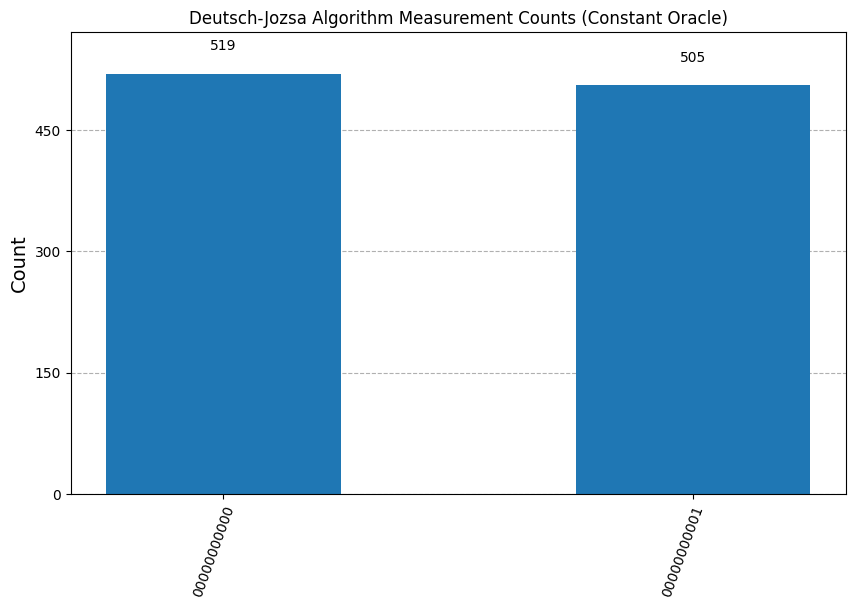

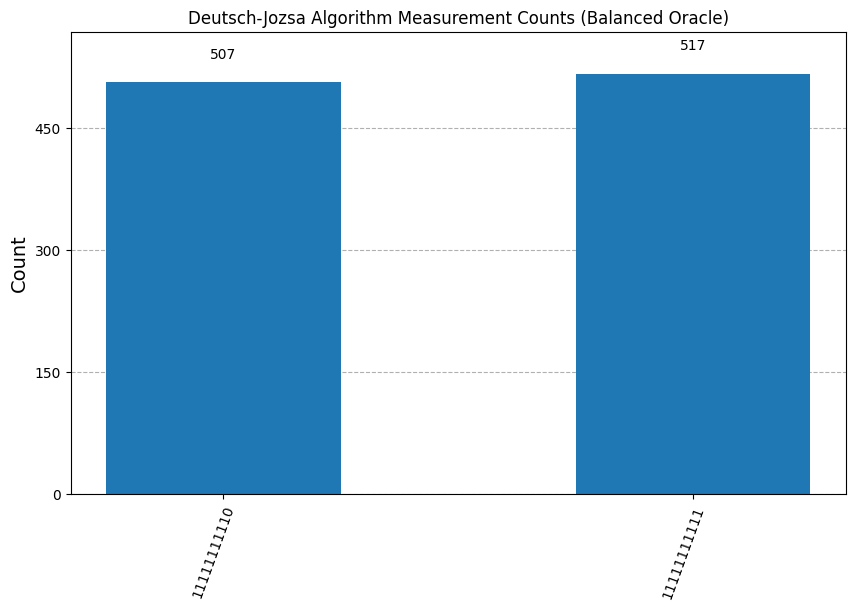

In [79]:
#====================Constant Case ====================#====================#====================
qc_constant = deutsch_jozsa_circuit("constant", n)

qc_constant.save_statevector()

simulator = AerSimulator()  # Circuit simulator

compiled_circuit_constant = transpile(qc_constant, simulator)

job_constant = simulator.run(compiled_circuit_constant)

result_constant = job_constant.result()

statevector_constant = result_constant.get_statevector(compiled_circuit_constant)

latex_equation_constant = r"$\text{Statevector (Constant Oracle): } |\psi\rangle = "

basis_states = [r'|000\rangle', r'|100\rangle', r'|010\rangle', r'|110\rangle', 
                r'|001\rangle', r'|101\rangle', r'|011\rangle', r'|111\rangle']

for amp, state in zip(statevector_constant.data, basis_states):
    real_part = np.real(amp)
    imag_part = np.imag(amp)
    if real_part != 0 or imag_part != 0:
        if imag_part >= 0:
            latex_equation_constant += f"({real_part:.2f}+{imag_part:.2f}i){state} + "
        else:
            latex_equation_constant += f"({real_part:.2f} - {abs(imag_part):.2f}i){state} + "

latex_equation_constant = latex_equation_constant[:-3] + "$"  # Remove trailing '+'

display(Latex(latex_equation_constant))

#===============Balanced Case=====#====================#====================#====================
qc_balanced = deutsch_jozsa_circuit('balanced', n)

qc_balanced.save_statevector()

compiled_circuit_balanced = transpile(qc_balanced, simulator)

job_balanced = simulator.run(compiled_circuit_balanced)

result_balanced = job_balanced.result()

statevector_balanced = result_balanced.get_statevector(compiled_circuit_balanced)

latex_equation_balanced = r"$\text{Statevector (Balanced Oracle): } |\psi\rangle = "

for amp, state in zip(statevector_balanced.data, basis_states):
    real_part = np.real(amp)
    imag_part = np.imag(amp)
    if real_part != 0 or imag_part != 0:
        if imag_part >= 0:
            latex_equation_balanced += f"({real_part:.2f}+{imag_part:.2f}i){state} + "
        else:
            latex_equation_balanced += f"({real_part:.2f} - {abs(imag_part):.2f}i){state} + "

latex_equation_balanced = latex_equation_balanced[:-3] + "$"  # Remove trailing '+'

display(Latex(latex_equation_balanced))

# Add measurement and plot histograms
qc_constant.measure_all()
qc_balanced.measure_all()

compiled_circuit_constant_with_measure = transpile(qc_constant, simulator)
result_constant_with_measure = simulator.run(compiled_circuit_constant_with_measure, shots=1024).result()

counts_constant = result_constant_with_measure.get_counts()
counts_constant_reversed = {key[::-1]: value for key, value in counts_constant.items()}

fig_constant = plt.figure(figsize=(10, 6))
ax_constant = fig_constant.add_subplot(111)
plot_histogram(counts_constant_reversed, title="Deutsch-Jozsa Algorithm Measurement Counts (Constant Oracle)", ax=ax_constant)
plt.show()

compiled_circuit_balanced_with_measure = transpile(qc_balanced, simulator)
result_balanced_with_measure = simulator.run(compiled_circuit_balanced_with_measure, shots=1024).result()

counts_balanced = result_balanced_with_measure.get_counts()
counts_balanced_reversed = {key[::-1]: value for key, value in counts_balanced.items()}

fig_balanced = plt.figure(figsize=(10, 6))
ax_balanced = fig_balanced.add_subplot(111)
plot_histogram(counts_balanced_reversed, title="Deutsch-Jozsa Algorithm Measurement Counts (Balanced Oracle)", ax=ax_balanced)
plt.show()

# Results:
## When using the Deustch Algorithm and the way I implemented my constant and balanced function where the constant function does nothing and the balanced function applies a CNOT. The output for the constant should be leading in n zeroes and ending in a 1 and a zero equally from the |-> operator. The balanced should be the same but with leading ones which is what happened for my experiment.